In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib.image import imread

In [3]:
data_dir = 'C:\\Users\\HP\\Documents\\cell_images'

In [4]:
import os
os.listdir(data_dir)

['cell_images']

In [5]:
directory = data_dir + '\\cell_images'
os.listdir(directory)

['test', 'train']

In [6]:
train_path = directory + '\\' + 'train'

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
para_cell = os.listdir(train_path + '\\' + 'parasitized')[0]

In [9]:
para_cell

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell = train_path + '\\' + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell = imread(para_cell)

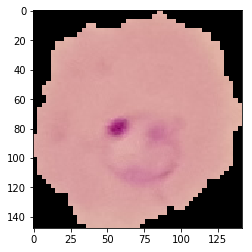

In [12]:
plt.imshow(para_cell)

In [13]:
uninfected_cell = os.listdir(train_path + '\\' + 'uninfected')[0]
uninfected_cell

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [14]:
uninfected_cell = train_path + '\\' + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
uninfected_cell = imread(uninfected_cell)

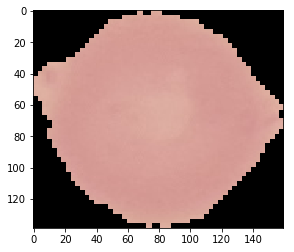

In [16]:
plt.imshow(uninfected_cell)

In [17]:
# This above shows what an uninfected and parasitized cell looks like

In [18]:
test_path = directory + '\\' + 'test'

In [19]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + '\\' + 'uninfected'):
    img = imread(test_path + '\\' + 'uninfected\\' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [20]:
"""The images have different sizes so they all need to be scaled or expanded into a
uniform before being fed into the model"""

'The images have different sizes so they all need to be scaled or expanded into a\nuniform before being fed into the model'

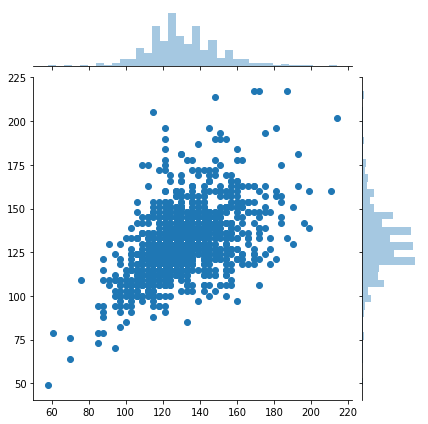

In [21]:
sns.jointplot(dim1,dim2)

In [22]:
np.mean(dim1)

130.92538461538462

In [23]:
np.mean(dim2)

130.75

In [24]:
image_shape = (130,130,3)

In [25]:
"""They will be scaled into a 130 by 130 by 3 size since thats the mean size of
the images"""

'They will be scaled into a 130 by 130 by 3 size since thats the mean size of\nthe images'

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
len(os.listdir(test_path + '\\' + 'uninfected'))

1300

In [28]:
len(os.listdir(test_path + '\\' + 'parasitized'))

1300

In [29]:
len(os.listdir(train_path + '\\' + 'uninfected'))

12480

In [30]:
len(os.listdir(train_path + '\\' + 'parasitized'))

12480

In [31]:
# Using the Image Data generator to perform Data Augmentation

In [32]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [33]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [34]:
para_cell = train_path + '\\' + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [35]:
para_img = imread(para_cell)

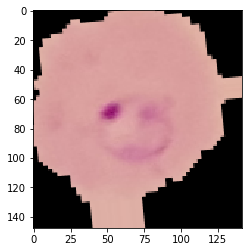

In [36]:
plt.imshow(image_gen.random_transform(para_img))

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [43]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [41]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [42]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               batch_size=16,
                                               class_mode='binary',
                                               color_mode='rgb')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               batch_size=16,
                                               class_mode='binary',
                                               shuffle=False,
                                               color_mode='rgb')

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [44]:
model.fit_generator(train_image_gen, epochs=10,
                    validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/10
1560/1560 [==============================] - 954s 609ms/step - loss: 2.2191 - accuracy: 0.5251 - val_loss: 0.6765 - val_accuracy: 0.5812
Epoch 2/10
1560/1560 [==============================] - 679s 435ms/step - loss: 0.6851 - accuracy: 0.5586 - val_loss: 0.6840 - val_accuracy: 0.5535
Epoch 3/10
1560/1560 [==============================] - 606s 389ms/step - loss: 0.6814 - accuracy: 0.5712 - val_loss: 0.6742 - val_accuracy: 0.5712
Epoch 4/10
1560/1560 [==============================] - 649s 416ms/step - loss: 0.6773 - accuracy: 0.5804 - val_loss: 0.6755 - val_accuracy: 0.5923
Epoch 5/10
1560/1560 [==============================] - 808s 518ms/step - loss: 0.6738 - accuracy: 0.5888 - val_loss: 0.6701 - val_accuracy: 0.6004
Epoch 6/10
1560/1560 [==============================] - 787s 504ms/step - loss: 0.4696 - accuracy: 0.7785 - val_loss: 0.2075 - val_accuracy: 0.9246
Epoch 7/10
1560/1560 [==============================] - 715s 458ms/step - loss: 0.2074 - accuracy: 0.9293 - val_

In [45]:
metrics = pd.DataFrame(model.history.history)

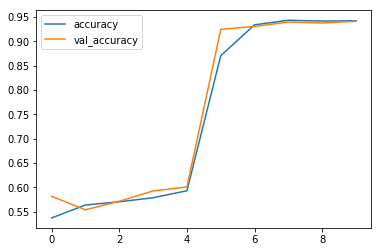

In [46]:
metrics[['accuracy','val_accuracy']].plot()

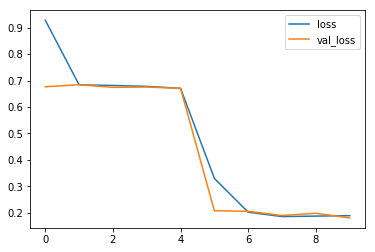

In [47]:
metrics[['loss','val_loss']].plot()

In [48]:
prediction_probabilities = model.predict_generator(test_image_gen)

In [49]:
predictions = prediction_probabilities > 0.5

In [52]:
prediction_probabilities

array([[2.1699458e-02],
       [9.3939900e-04],
       [4.2903423e-04],
       ...,
       [9.5159316e-01],
       [9.4793260e-01],
       [9.5753747e-01]], dtype=float32)

In [51]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(test_image_gen.classes, predictions))
print('\n')
print(confusion_matrix(test_image_gen.classes, predictions))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94      1300
          1       0.92      0.96      0.94      1300

avg / total       0.94      0.94      0.94      2600



[[1196  104]
 [  54 1246]]


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print(accuracy_score(test_image_gen.classes, predictions))

0.9392307692307692


In [58]:
'''We have been able to predict with an accuarcy of 94% whether a patient has
malaria or not based off the image of his or her cell'''

'We have been able to predict with an accuarcy of 94% whether a patient has\nmalaria or not based off the image of his or her cell'

In [59]:
import pickle

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model.save('malaria_detector_model.h5')